In [1]:
import pandas as pd
import numpy as np
import json
from itertools import chain

import matplotlib.pyplot as plt
import matplotlib as mpl

import seaborn as sns

from matplotlib.patches import Patch

import time
import glob

params = {
   'axes.labelsize': 14,
   'font.size': 14,
   'legend.fontsize': 14,
   'xtick.labelsize': 14,
   'ytick.labelsize': 14,
   'text.usetex': False,
   'figure.figsize': [4.5, 4.5],
    'savefig.facecolor':'white'
   }

mpl.rcParams.update(params)

timestr = time.strftime("%Y%m%d%H%M")

In [2]:
sol_saveat_dt = [1,1e-4][0]

print(sol_saveat_dt)

inpath = "output/"
outpath = "figures/fig2/" 

1


In [4]:
##############################################
# set to True to save fig

savefigures = False #False #True 

##############################################

In [5]:
print(len(glob.glob(inpath+"*_u.csv"))) 

190


In [6]:
input_file_ids = [i.rstrip("_u.csv") for i in glob.glob(inpath+"*_u.csv")]


In [7]:
input_file_ids = sorted(input_file_ids)

In [8]:
input_dfs = []

for fid in input_file_ids:

    dfn = fid + "_u.csv"
    tfn = fid + "_t.csv"
    nfn = fid + "_unames.csv"
    
    df = pd.read_csv(dfn,header=None)
    tf = pd.read_csv(tfn,header=None)
    nf = pd.read_csv(nfn,header=None)
    
    df.columns = [i[:-1] for i in nf[0].values.tolist() ]
    
    df['time_s'] = tf[0].copy()
    df['condition'] = fid.replace("output/sim_","").split("_extraTag",1)[0]
    
    input_dfs.append(df)
    
input_df = pd.concat(input_dfs, axis=0, ignore_index=True)

In [9]:
print(input_df.shape)

(58900, 185)


In [10]:
mets2plot2_sel3met = [i[0:-1] for i in ["Mg_x_n0","NADHmito_n0", "QH2mito_n0", "CytCredmito_n0",  
            "ATPmito_n0", "ATP_mx_n0", "ATP_i_n0", "ATP_mi_n0", 
             
            "ATP_n0", "FUMmito_n0", "MALmito_n0", "OXAmito_n0", "SUCmito_n0", "SUCCOAmito_n0", "CoAmito_n0", 
            "AKGmito_n0",  "ISOCITmito_n0", "CITmito_n0", "AcCoAmito_n0", "AcAc_n0", "AcAcCoA_n0", "PYRmito_n0", "bHB_n0", "bHB_ecs0", "bHB_b0",  "GLU_n0", 
            "NADH_n0", "Mg_x_a0",   "NADHmito_a0", "QH2mito_a0", "CytCredmito_a0",  
            "ATPmito_a0",   "ATP_mx_a0",  "ATP_i_a0",   "ATP_mi_a0",  
             
            "ATP_a0",  "FUMmito_a0", "MALmito_a0", "OXAmito_a0", "SUCmito_a0", "SUCCOAmito_a0", "CoAmito_a0", 
            "AKGmito_a0", "ISOCITmito_a0", "CITmito_a0", "AcCoAmito_a0", "PYRmito_a0", 
            "GLN_a0", "GLUT_a0", 
             
            "ddHb0", "O2cap0", 
              "Glc_b0", "Glc_t_t0", "Glc_ecsBA0", "Glc_a0", "Glc_ecsAN0", "Glc_n0", "G6P_n0", "G6P_a0", "F6P_n0", "F6P_a0", "FBP_n0", "FBP_a0", "f26bp_a0", "GLY_a0", "G1P_a0", "GAP_n0", "GAP_a0", 
              "DHAP_n0", "DHAP_a0", "BPG13_n0", "BPG13_a0", "NADH_a0", "PG3_n0", "PG3_a0", "PG2_n0", "PG2_a0", "PEP_n0", "PEP_a0", "Pyr_n0", "Pyr_a0", "Lac_b0", "Lac_ecs0", "Lac_a0", "Lac_n0", 
              "NADPH_n0", "NADPH_a0", "R5P_n0", "R5P_a0",  "E4P_n0", "E4P_a0", 
              "GSH_n0", "GSH_a0", "cAMP_a0"
]]

print(len(mets2plot2_sel3met))

94


In [11]:
all_cnds_l = input_df['condition'].unique()

group1_control = [i for i in all_cnds_l if (not i.startswith('g')) and (not i.startswith('th')) and ("_dose" not in i) 
                 ]

print(len(group1_control))



group2_GLUT1 = [i for i in all_cnds_l if ((i.startswith('g1_')) or (i.startswith('th_')))  and ("_dose" not in i) 
               ]

print(len(group2_GLUT1))


31
38


In [12]:
group1_control

['10_lac_pls',
 '11_bhb_pls',
 '121_default',
 '12_akg_pls',
 '13_succoa_pls',
 '14_fum_pls',
 '15_mal_pls',
 '16_oxa_pls',
 '17_glclac_ini',
 '18_glcbhb_ini',
 '19_lacbhb_ini',
 '1_blood_glc_ini',
 '20_glclacbhb_ini',
 '2_blood_lac_ini',
 '3_blood_bhb_ini',
 '4_aKG_ini',
 '5_succoa_ini',
 '63_AcAcCoA_ini',
 '64_Acon',
 '6_fum_ini',
 '7_mal_ini',
 '82_ISOCIT',
 '83_LDH',
 '84_PCm_bloodglc',
 '85_PCm',
 '86_PDHdef_bloodglc',
 '87_PDHdef_bloodlac',
 '88_PDHdef',
 '89_SUCmito',
 '8_oxa_ini',
 '9_glc_pls']

In [13]:
group2_GLUT1

['g1_118_keto_lac_nad',
 'g1_119_keto_lac_nad_Qtot_n',
 'g1_120_keto_lac_nad_Qtot_na',
 'g1_21_blood_glc_ini',
 'g1_22_blood_lac_ini',
 'g1_23_blood_bhb_ini',
 'g1_24_aKG_ini',
 'g1_25_succoa_ini',
 'g1_26_fum_ini',
 'g1_27_mal_ini',
 'g1_28_oxa_ini',
 'g1_29_glc_pls',
 'g1_30_lac_pls',
 'g1_31_bhb_pls',
 'g1_32_akg_pls',
 'g1_33_succoa_pls',
 'g1_34_fum_pls',
 'g1_35_mal_pls',
 'g1_36_oxa_pls',
 'g1_37_glclac_ini',
 'g1_38_glcbhb_ini',
 'g1_39_lacbhb_ini',
 'g1_40_glclacbhb_ini',
 'g1_61_def',
 'g1_65_PCm_keto',
 'g1_66_PCm_lac',
 'g1_67_PCm',
 'g1_68_AcAcCoA',
 'g1_69_Acon',
 'g1_70_ISOCIT',
 'g1_71_LDH_keto',
 'g1_72_LDH',
 'g1_73_PDH_keto',
 'g1_74_PDH_lac',
 'g1_75_PDH',
 'g1_76_SUCmito',
 'g1_90_AcAcCoa_lac',
 'g1_91_PDH_Lac_keto']

In [14]:
cnds_groups = {
    'group1_control':group1_control,
    'group2_GLUT1d':group2_GLUT1
}


In [15]:
input_df_mp = input_df.loc[(input_df['time_s']>=180),:].copy()  

input_df_mp = input_df_mp.loc[(input_df_mp['condition'].isin(group1_control)),:].copy() 
input_df_mp.head(3)

,C_H_mitomatr_n,K_x_n,Mg_x_n,NADHmito_n,QH2mito_n,CytCredmito_n,O2_n,ATPmito_n,ADPmito_n,ATP_mx_n,...,PCr_a,cAMP_a,NE_neuromod,UDPgluco_a,UTP_a,GS_a,GPa_a,GPb_a,time_s,condition
179,0.000018,54.885139,0.63959,0.314409,0.015754,0.132538,0.031431,0.743227,1.856773,0.206694,...,4.927256,0.039110,0.0,0.109,0.23,0.003,0.001347,0.068653,180.0,10_lac_pls
180,0.000018,54.885139,0.63959,0.314409,0.015753,0.132538,0.031431,0.743228,1.856772,0.206695,...,4.927248,0.039110,0.0,0.109,0.23,0.003,0.001347,0.068653,181.0,10_lac_pls
181,0.000018,54.885139,0.63959,0.314409,0.015753,0.132538,0.031431,0.743228,1.856772,0.206695,...,4.927240,0.039109,0.0,0.109,0.23,0.003,0.001347,0.068653,182.0,10_lac_pls


In [17]:
input_df_mp['condition'].nunique(), input_df_mp.shape

(31, (4061, 185))

In [14]:
input_df_mp = input_df_mp.drop(columns='condition')


input_df_mp.head(3)

,C_H_mitomatr_n,K_x_n,Mg_x_n,NADHmito_n,QH2mito_n,CytCredmito_n,O2_n,ATPmito_n,ADPmito_n,ATP_mx_n,...,Cr_a,PCr_a,cAMP_a,NE_neuromod,UDPgluco_a,UTP_a,GS_a,GPa_a,GPb_a,time_s
179,0.000018,54.885139,0.63959,0.314409,0.015754,0.132538,0.031431,0.743227,1.856773,0.206694,...,5.075794,4.927256,0.039110,0.0,0.109,0.23,0.003,0.001347,0.068653,180.0
180,0.000018,54.885139,0.63959,0.314409,0.015753,0.132538,0.031431,0.743228,1.856772,0.206695,...,5.075794,4.927248,0.039110,0.0,0.109,0.23,0.003,0.001347,0.068653,181.0
181,0.000018,54.885139,0.63959,0.314409,0.015753,0.132538,0.031431,0.743228,1.856772,0.206695,...,5.075794,4.927240,0.039109,0.0,0.109,0.23,0.003,0.001347,0.068653,182.0


In [15]:
input_df_mp_cvAmpl = pd.DataFrame(input_df_mp.groupby("time_s").apply(lambda x: np.std(np.abs(x))/np.mean(np.abs(x)) ))

print(input_df_mp_cvAmpl.shape)

input_df_mp_cvAmpl = input_df_mp_cvAmpl.drop(columns='time_s')

input_df_mp_cvAmpl.head(3)

(131, 184)


,C_H_mitomatr_n,K_x_n,Mg_x_n,NADHmito_n,QH2mito_n,CytCredmito_n,O2_n,ATPmito_n,ADPmito_n,ATP_mx_n,...,PCr_n,Cr_a,PCr_a,cAMP_a,NE_neuromod,UDPgluco_a,UTP_a,GS_a,GPa_a,GPb_a
time_s,,,,,,,,,,,,,,,,,,,,,
180.0,1.860745e-16,1.294599e-16,0.000725,0.003804,0.006408,0.002057,0.000901,0.003613,0.001451,0.004139,...,0.000887,5.249494e-16,0.000139,0.000381,NaN,0.0,8.447349e-16,0.0,0.009603,0.000187
181.0,1.860745e-16,1.294599e-16,0.000726,0.003800,0.006424,0.002062,0.000900,0.003618,0.001453,0.004144,...,0.000891,5.249494e-16,0.000140,0.000381,NaN,0.0,8.447349e-16,0.0,0.009615,0.000188
182.0,1.860745e-16,1.294599e-16,0.000727,0.003795,0.006439,0.002066,0.000900,0.003623,0.001455,0.004150,...,0.000895,5.249494e-16,0.000141,0.000382,NaN,0.0,8.447349e-16,0.0,0.009628,0.000188


In [16]:
input_df_mp_cvAmpl = input_df_mp_cvAmpl.reset_index(drop=False)

input_df_mp_cvAmpl_l = pd.melt(input_df_mp_cvAmpl,id_vars=['time_s'])


In [17]:
input_df_mp_cvAmpl_l.head(3)

,time_s,variable,value
0,180.0,C_H_mitomatr_n,1.860745e-16
1,181.0,C_H_mitomatr_n,1.860745e-16
2,182.0,C_H_mitomatr_n,1.860745e-16


In [18]:
input_df_mp_cvAmpl_l.head(3)

,time_s,variable,value
0,180.0,C_H_mitomatr_n,1.860745e-16
1,181.0,C_H_mitomatr_n,1.860745e-16
2,182.0,C_H_mitomatr_n,1.860745e-16


In [19]:
def get_cmps_index(df):
    cmps1 = []
    for i in df['variable'].to_list():
        if len(i.split("_")) >1:
            if i.split("_")[-1] == "ecsAN0":
                cmps1.append("ecs")
            elif i.split("_")[-1] == "ecsBA0":
                cmps1.append("ecs")
            elif i.split("_")[-1] == "out0":
                cmps1.append("ecs")
            else:
                cmps1.append(i.split("_")[-1].rstrip("0"))
        else:
            #print(i)
            cmps1.append("other")
            
    return cmps1

cmps = get_cmps_index(input_df_mp_cvAmpl_l)

In [20]:
input_df_mp_cvAmpl_l['cmps'] = cmps
input_df_mp_cvAmpl_l.head(3)

,time_s,variable,value,cmps
0,180.0,C_H_mitomatr_n,1.860745e-16,n
1,181.0,C_H_mitomatr_n,1.860745e-16,n
2,182.0,C_H_mitomatr_n,1.860745e-16,n


In [ ]:
fid = '202303211313'
with open(f"data/v2function_{fid}.json","r") as f:
    v2function = json.load(f)

lut_funs = {'keto': '#a6cee3',
 'ETC': '#1f78b4',
 'TCA': '#b2df8a',
 'redox': '#33a02c',
 'ATDMP': '#fb9a99',
 'GLTGLN': '#e31a1c',
 'resp': '#fdbf6f',
 'GLCLS': '#ff7f00',
 'PPP': '#cab2d6'}

input_df_mp_cvAmpl_l['fns'] = input_df_mp_cvAmpl_l['variable'].map(v2function)

input_df_mp_cvAmpl_l.head(3)

In [22]:
input_df_mp_cvAmpl_l = input_df_mp_cvAmpl_l.sort_values(by=['cmps','fns'],ascending=False)

input_df_mp_cvAmpl_l.head(3)

,time_s,variable,value,cmps,fns
15065,180.0,Glc_t_t,0.077604,t,GLCLS
15066,181.0,Glc_t_t,0.077803,t,GLCLS
15067,182.0,Glc_t_t,0.078001,t,GLCLS


In [23]:
input_df_mp_cvAmpl_l[["variable_id","variable_cmp"]] = input_df_mp_cvAmpl_l['variable'].str.split("_",1, expand=True)

In [24]:
mypal_cmps = ['#32db70','#06916a','red'] 
lut_cmps = dict(zip(['n','a','b_ecs'], mypal_cmps))

In [25]:
input_df_mp_cvAmpl_l_sel = input_df_mp_cvAmpl_l.loc[input_df_mp_cvAmpl_l['variable'].isin(mets2plot2_sel3met),:].copy()

In [26]:
input_df_mp_cvAmpl_l_sel.head()

,time_s,variable,value,cmps,fns,variable_id,variable_cmp
15065,180.0,Glc_t_t,0.077604,t,GLCLS,Glc,t_t
15066,181.0,Glc_t_t,0.077803,t,GLCLS,Glc,t_t
15067,182.0,Glc_t_t,0.078001,t,GLCLS,Glc,t_t
15068,183.0,Glc_t_t,0.078199,t,GLCLS,Glc,t_t
15069,184.0,Glc_t_t,0.078397,t,GLCLS,Glc,t_t


In [27]:
# remove met that are present only in one of the cell types

met_n = []
met_a = []

for i,row in input_df_mp_cvAmpl_l_sel.iterrows():
    if row['cmps'] == 'n':
        met_n.append(row['variable_id'])
    elif row['cmps'] == 'a':
        met_a.append(row['variable_id'])
        
met_na = list(set(set(met_n).intersection(met_a)))

len(met_na)

34

In [28]:
sorted(met_na)

['AKGmito',
 'ATP',
 'ATPmito',
 'AcCoAmito',
 'BPG13',
 'CITmito',
 'CoAmito',
 'CytCredmito',
 'DHAP',
 'E4P',
 'F6P',
 'FBP',
 'FUMmito',
 'G6P',
 'GAP',
 'GSH',
 'Glc',
 'ISOCITmito',
 'Lac',
 'MALmito',
 'Mg',
 'NADH',
 'NADHmito',
 'NADPH',
 'OXAmito',
 'PEP',
 'PG2',
 'PG3',
 'PYRmito',
 'Pyr',
 'QH2mito',
 'R5P',
 'SUCCOAmito',
 'SUCmito']

In [29]:
input_df_mp_cvAmpl_l_sel = input_df_mp_cvAmpl_l.loc[input_df_mp_cvAmpl_l['variable_id'].isin(met_na),:].copy()

In [30]:
input_df_mp_cvAmpl_l_sel.shape

(10480, 7)

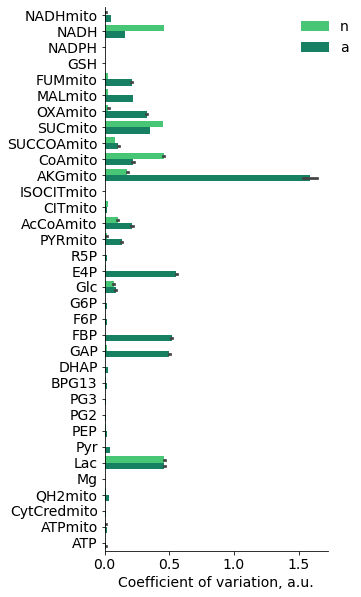

In [31]:
fig = plt.figure(figsize=(4,10))
ax = plt.subplot(111)


sns.barplot(ax=ax,
            data=input_df_mp_cvAmpl_l_sel.loc[input_df_mp_cvAmpl_l_sel['cmps'].isin(['n','a'])], 
            x='value', y='variable_id', 
            hue="cmps",palette=lut_cmps,orient='h',ci=95)

ax.spines.top.set_visible(False)
ax.spines.right.set_visible(False)

ax.set_ylabel("")
ax.set_xlabel("Coefficient of variation, a.u.")

ax.legend(bbox_to_anchor=(1.15, 1.0),frameon=False)

plt.show()


if savefigures == True:
    
    spec_id = "suppFig_CV_overCNDS_perT_control_"
    
    fig.savefig(outpath +  spec_id +  timestr + ".pdf",transparent=False, bbox_inches="tight")
    fig.savefig(outpath +  spec_id +  timestr + ".png",dpi=300,transparent=False, bbox_inches="tight")


In [32]:
print("n = ",input_df_mp_cvAmpl_l_sel.loc[input_df_mp_cvAmpl_l_sel['cmps'].isin(['n']),'value'].mean(), "\n",
"a = ",input_df_mp_cvAmpl_l_sel.loc[input_df_mp_cvAmpl_l_sel['cmps'].isin(['a']),'value'].mean())

n =  0.06678604647283767 
 a =  0.16106161548004652


In [ ]:
print('dotted,','color=#208c48',np.log(input_df_mp_cvAmpl_l_sel.loc[input_df_mp_cvAmpl_l_sel['cmps'].isin(['n']),'value'].mean())) #, color='#208c48', linestyle='dotted', lw=1) # 
print('dotted,','color=#03402e',np.log(input_df_mp_cvAmpl_l_sel.loc[input_df_mp_cvAmpl_l_sel['cmps'].isin(['a']),'value'].mean())) #, color='#03402e', linestyle='dotted', lw=1) # 

print('solid line,','color=#208c48',np.log(input_df_mp_cvAmpl_l_sel.loc[input_df_mp_cvAmpl_l_sel['cmps'].isin(['n']),'value'].median())) #, color='#208c48', linestyle='-', lw=1) # 
print('solid line,','color=#03402e',np.log(input_df_mp_cvAmpl_l_sel.loc[input_df_mp_cvAmpl_l_sel['cmps'].isin(['a']),'value'].median())) #, color='#03402e', linestyle='-', lw=1) # 

# dotted, color=#208c48 -2.706261105396236
# dotted, color=#03402e -1.825968282365485
# solid line, color=#208c48 -5.156003957815724
# solid line, color=#03402e -3.598420598810139

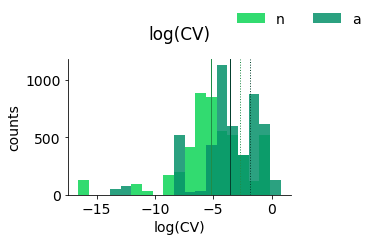

In [33]:
fig = plt.figure(figsize = (4,2.5))
ax = plt.subplot(111)

nbins=20

bins_shared = np.linspace( -0.1 + np.min([np.min(np.log(input_df_mp_cvAmpl_l_sel.loc[input_df_mp_cvAmpl_l_sel['cmps'].isin(['n']),'value'].values)),
                                   np.min(np.log(input_df_mp_cvAmpl_l_sel.loc[input_df_mp_cvAmpl_l_sel['cmps'].isin(['a']),'value'].values))]),
                          
                          0.1 + np.max([np.max(np.log(input_df_mp_cvAmpl_l_sel.loc[input_df_mp_cvAmpl_l_sel['cmps'].isin(['n']),'value'].values)),
                                   np.max(np.log(input_df_mp_cvAmpl_l_sel.loc[input_df_mp_cvAmpl_l_sel['cmps'].isin(['a']),'value'].values))]),
                          nbins
                         )



plt.hist( np.log(input_df_mp_cvAmpl_l_sel.loc[input_df_mp_cvAmpl_l_sel['cmps'].isin(['n']),'value'].values),bins=bins_shared,color=lut_cmps['n'],label='n')

plt.hist( np.log(input_df_mp_cvAmpl_l_sel.loc[input_df_mp_cvAmpl_l_sel['cmps'].isin(['a']),'value'].values),bins=bins_shared,color=lut_cmps['a'],label='a', alpha=0.85)


ax.axvline(x=np.log(input_df_mp_cvAmpl_l_sel.loc[input_df_mp_cvAmpl_l_sel['cmps'].isin(['n']),'value'].mean()), color='#208c48', linestyle='dotted', lw=1) # 
ax.axvline(x=np.log(input_df_mp_cvAmpl_l_sel.loc[input_df_mp_cvAmpl_l_sel['cmps'].isin(['a']),'value'].mean()), color='#03402e', linestyle='dotted', lw=1) # 

ax.axvline(x=np.log(input_df_mp_cvAmpl_l_sel.loc[input_df_mp_cvAmpl_l_sel['cmps'].isin(['n']),'value'].median()), color='#208c48', linestyle='-', lw=1) # 
ax.axvline(x=np.log(input_df_mp_cvAmpl_l_sel.loc[input_df_mp_cvAmpl_l_sel['cmps'].isin(['a']),'value'].median()), color='#03402e', linestyle='-', lw=1) # 


ax.legend(bbox_to_anchor=(0.7,1.15),frameon=False, ncol=2)
#ax.legend(loc='upper left',frameon=False, ncol=2)

ax.set_xlabel("log(CV)")
ax.set_ylabel("counts")


ax.set_title("log(CV)", pad=20)

#ax.set_xlim((-16,6))

#ax.set_ylim((0,490))


ax.spines.top.set_visible(False)
ax.spines.right.set_visible(False)

#plt.tight_layout()

plt.show()

if savefigures == True:
    fig.savefig(outpath + "fig2c1_CVlog_hist_cmps_control_" + timestr + ".pdf",transparent=False)
    fig.savefig(outpath + "fig2c1_CVlog_hist_cmps_control_" + timestr + ".png",transparent=False, bbox_inches="tight")



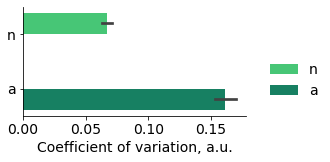

In [34]:
fig = plt.figure(figsize=(4,2))
ax = plt.subplot(111)


sns.barplot(ax=ax,
            data=input_df_mp_cvAmpl_l_sel.loc[input_df_mp_cvAmpl_l_sel['cmps'].isin(['n','a']),['value','cmps']], 
            x='value', y='cmps', 
            hue="cmps",palette=lut_cmps,orient='h', ci=95)


ax.spines.top.set_visible(False)
ax.spines.right.set_visible(False)

ax.set_ylabel("")
ax.set_xlabel("Coefficient of variation, a.u.")


ax.legend(bbox_to_anchor=(1.05, 0.6),frameon=False)

plt.show()



if savefigures == True:
    fig.savefig(outpath + "fig2c2_CV_cmps_ci95_control_" + timestr + ".pdf",transparent=False)
    fig.savefig(outpath + "fig2c2_CV_cmps_ci95_control_" + timestr + ".png",transparent=False, bbox_inches="tight")



In [35]:
agg_all_cond = pd.DataFrame(input_df_mp_cvAmpl_l_sel.loc[input_df_mp_cvAmpl_l_sel['cmps'].isin(['n','a']),['value','cmps']].groupby('cmps')['value'].apply(np.mean)).reset_index(drop=False)
agg_all_cond.columns = ['cmps','value']

In [36]:
agg_all_cond

,cmps,value
0,a,0.161062
1,n,0.066786


In [37]:
agg_all_cond = pd.DataFrame(input_df_mp_cvAmpl_l_sel.loc[input_df_mp_cvAmpl_l_sel['cmps'].isin(['n','a']),['value','cmps']].groupby('cmps').apply(np.nanmedian)).reset_index(drop=False)
agg_all_cond.columns = ['cmps','value']


In [38]:
agg_all_cond

,cmps,value
0,a,0.027367
1,n,0.005765


In [39]:
agg_all_cond_fns = pd.DataFrame(input_df_mp_cvAmpl_l_sel.loc[input_df_mp_cvAmpl_l_sel['cmps'].isin(['n','a']),['value','cmps','fns']].groupby(['cmps','fns']).apply(np.nanmedian)).reset_index(drop=False)
agg_all_cond_fns.columns = ['cmps','fns','value']

agg_all_cond_fns.head(3)

,cmps,fns,value
0,a,ATDMP,0.000529
1,a,ETC,0.007208
2,a,GLCLS,0.021252


In [40]:
input_df_mp_cvAmpl_l_sel.head(3)

,time_s,variable,value,cmps,fns,variable_id,variable_cmp
15065,180.0,Glc_t_t,0.077604,t,GLCLS,Glc,t_t
15066,181.0,Glc_t_t,0.077803,t,GLCLS,Glc,t_t
15067,182.0,Glc_t_t,0.078001,t,GLCLS,Glc,t_t


In [41]:
input_df_mp_cvAmpl_l_sel.loc[input_df_mp_cvAmpl_l_sel['fns']=='redox','variable'].unique()

array(['NADHmito_n', 'NADH_n', 'NADPH_n', 'GSH_n', 'NADHmito_a', 'NADH_a',
       'NADPH_a', 'GSH_a'], dtype=object)

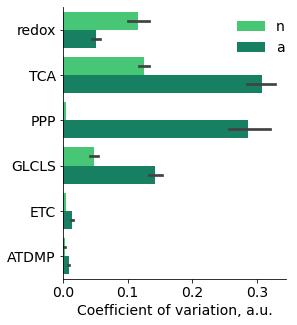

In [42]:
fig = plt.figure(figsize=(4,5))
ax = plt.subplot(111)


sns.barplot(ax=ax,
            data=input_df_mp_cvAmpl_l_sel.loc[input_df_mp_cvAmpl_l_sel['cmps'].isin(['n','a']),['value','cmps','fns']], 
            x='value', y='fns', 
            hue="cmps",palette=lut_cmps,orient='h',ci=95)

ax.spines.top.set_visible(False)
ax.spines.right.set_visible(False)


ax.set_ylabel("")
ax.set_xlabel("Coefficient of variation, a.u.")


ax.legend(bbox_to_anchor=(1.05, 1.0),frameon=False)

plt.show()



if savefigures == True:
    fig.savefig(outpath + "fig2c3_CV_fns_ci95_control_" + timestr + ".pdf",transparent=False)
    fig.savefig(outpath + "fig2c3_CV_fns_ci95_control_" + timestr + ".png",transparent=False, bbox_inches="tight")



In [ ]:
pd.DataFrame(input_df_mp_cvAmpl_l_sel.loc[input_df_mp_cvAmpl_l_sel['cmps'].isin(['n','a']),['value','cmps','fns']].groupby(['fns','cmps'])['value'].mean())

In [ ]:
pd.DataFrame(input_df_mp_cvAmpl_l_sel.loc[input_df_mp_cvAmpl_l_sel['cmps'].isin(['n','a']),['value','cmps','fns']].groupby(['fns','cmps'])['value'].std())